<a href="https://colab.research.google.com/github/bhrunnot/challenge_alura/blob/main/Challenge_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [86]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja2.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79


#1. Análise do faturamento



In [141]:
faturamento_por_loja = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

In [154]:
faturamento_por_loja

{'Loja 1': np.float64(1534509.12),
 'Loja 2': np.float64(1488459.06),
 'Loja 3': np.float64(1464025.03),
 'Loja 4': np.float64(1384497.58)}

# 2. Vendas por Categoria

In [89]:
categorias_por_loja = {
    'Loja 1': loja.groupby('Categoria do Produto')['Produto']
                  .count()
                  .sort_values(ascending=False),

    'Loja 2': loja2.groupby('Categoria do Produto')['Produto']
                   .count()
                   .sort_values(ascending=False),

    'Loja 3': loja3.groupby('Categoria do Produto')['Produto']
                   .count()
                   .sort_values(ascending=False),

    'Loja 4': loja4.groupby('Categoria do Produto')['Produto']
                   .count()
                   .sort_values(ascending=False)
}


In [155]:
categorias_por_loja

{'Loja 1': Categoria do Produto
 moveis                   465
 eletronicos              448
 brinquedos               324
 eletrodomesticos         312
 esporte e lazer          284
 instrumentos musicais    182
 livros                   173
 utilidades domesticas    171
 Name: Produto, dtype: int64,
 'Loja 2': Categoria do Produto
 moveis                   442
 eletronicos              422
 brinquedos               313
 eletrodomesticos         305
 esporte e lazer          275
 instrumentos musicais    224
 livros                   197
 utilidades domesticas    181
 Name: Produto, dtype: int64,
 'Loja 3': Categoria do Produto
 moveis                   499
 eletronicos              451
 brinquedos               315
 eletrodomesticos         278
 esporte e lazer          277
 livros                   185
 instrumentos musicais    177
 utilidades domesticas    177
 Name: Produto, dtype: int64,
 'Loja 4': Categoria do Produto
 moveis                   480
 eletronicos              451
 b

# 3. Média de Avaliação das Lojas


In [91]:
medias = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean(),
}


In [156]:

medias

{'Loja 1': np.float64(3.976685036032217),
 'Loja 2': np.float64(4.037303942348453),
 'Loja 3': np.float64(4.048325561678677),
 'Loja 4': np.float64(3.9957591178965224)}

# 4. Produtos Mais e Menos Vendidos

In [93]:
lojas = [loja, loja2, loja3, loja4]

mais_vendidos_por_loja = {}
menos_vendidos_por_loja = {}

for i, l in enumerate(lojas):
    nome_loja = f'Loja {i+1}'

    contagem = l['Produto'].value_counts()

    mais_vendidos_por_loja[nome_loja] = contagem.head(5)
    menos_vendidos_por_loja[nome_loja] = contagem.sort_values().head(5)


In [157]:
mais_vendidos_por_loja['Loja 1']


,count
Produto,
Micro-ondas,60
TV Led UHD 4K,60
Guarda roupas,60
Secadora de roupas,58
Cômoda,56


# 5. Frete Médio por Loja

In [95]:
frete = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean(),
}


In [96]:
frete

{'Loja 1': np.float64(34.69180491551149),
 'Loja 2': np.float64(33.62194065817927),
 'Loja 3': np.float64(33.07446427411743),
 'Loja 4': np.float64(31.278997081841727)}

#Gráficos


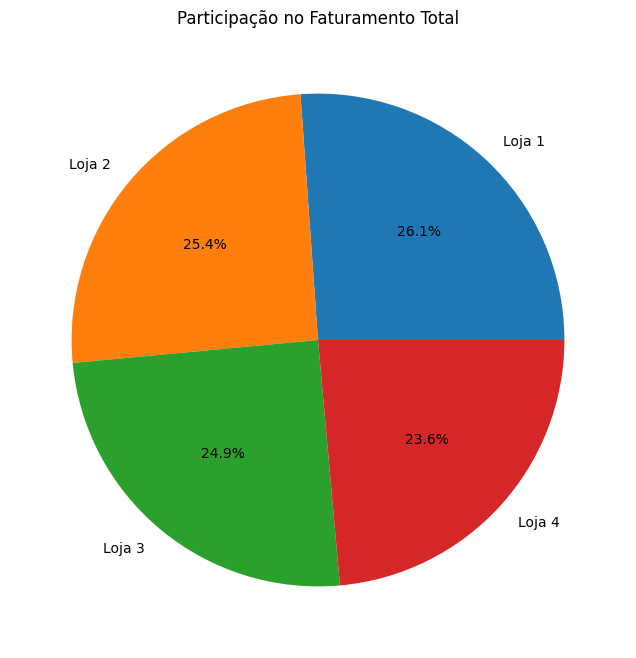

<Figure size 640x480 with 0 Axes>

In [158]:
import matplotlib.pyplot as plt

pd.Series(faturamento_por_loja).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8,8)
)

plt.title('Participação no Faturamento Total')
plt.ylabel('')
plt.show()

plt.savefig('faturamento.png', bbox_inches='tight')


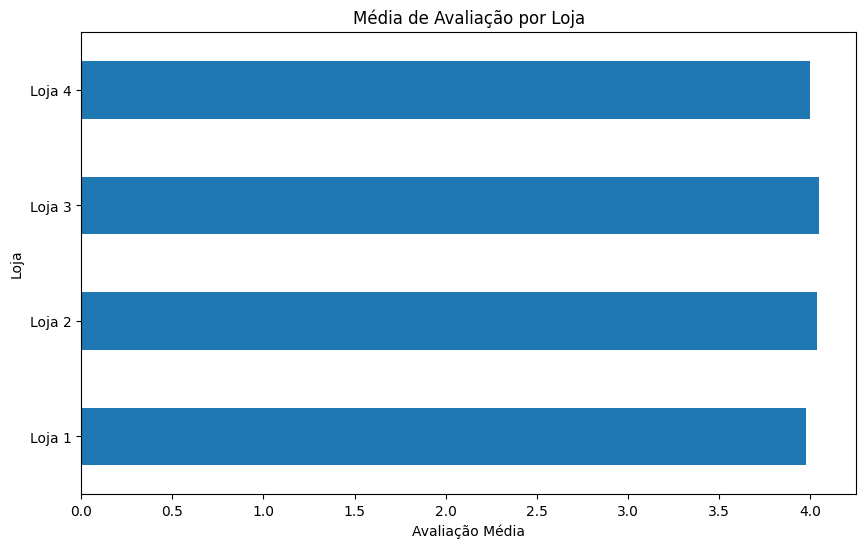

In [159]:
pd.Series(medias).plot(
    kind='barh',
    figsize=(10, 6)
)

plt.title('Média de Avaliação por Loja')
plt.xlabel('Avaliação Média')
plt.ylabel('Loja')
plt.show()


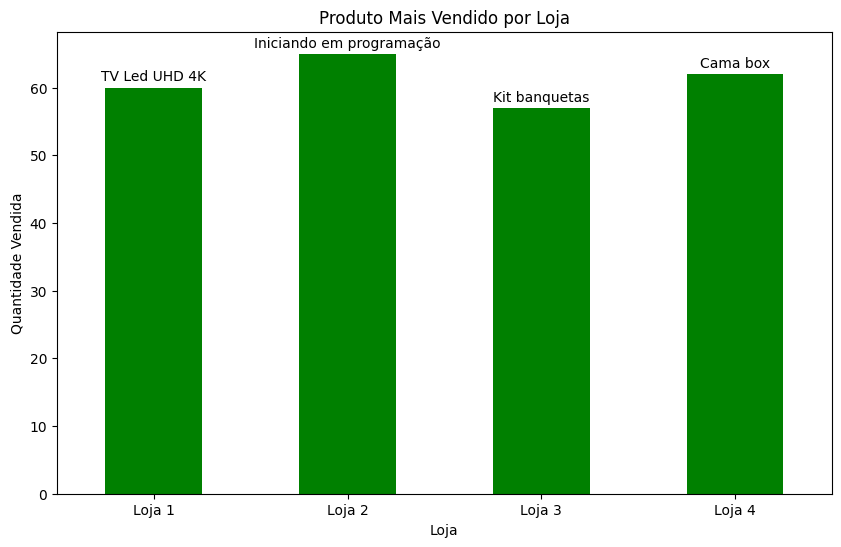

In [160]:
# Função que identifica o produto mais vendido de uma loja
def top_produto_loja(df, nome_loja):

    # Conta quantas vezes cada produto foi vendido
    vendas_produto = df.groupby('Produto').size().reset_index(name='Quantidade')

    # Calcula a média de avaliação de cada produto
    avaliacao_produto = df.groupby('Produto')['Avaliação da compra'].mean().reset_index()

    # Junta quantidade vendida com média de avaliação
    dados_produto = vendas_produto.merge(
        avaliacao_produto,
        on='Produto'
    )

    # Seleciona o produto com maior quantidade vendida
    top_produto = dados_produto.sort_values(
        by='Quantidade',
        ascending=False
    ).head(1)

    # Adiciona o nome da loja ao resultado
    top_produto['Loja'] = nome_loja

    return top_produto


# Aplica a função para todas as lojas e une os resultados
resultado_final = pd.concat([
    top_produto_loja(loja, 'Loja 1'),
    top_produto_loja(loja2, 'Loja 2'),
    top_produto_loja(loja3, 'Loja 3'),
    top_produto_loja(loja4, 'Loja 4')
])


# Define a loja como índice para facilitar a visualização no gráfico
grafico = resultado_final.set_index('Loja')

# Cria gráfico de barras com a quantidade vendida do produto campeão
ax = grafico['Quantidade'].plot(kind='bar', figsize=(10,6), color='green')

# Adiciona o nome do produto acima de cada barra
for i, v in enumerate(grafico['Quantidade']):
    ax.text(i, v + 1, grafico['Produto'].iloc[i], ha='center')

# Ajustes visuais do gráfico
plt.title('Produto Mais Vendido por Loja')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=0)
plt.show()



#Relatório Final


# Análise das Lojas

## 1. Introdução

O objetivo desta análise foi avaliar o desempenho das quatro lojas do Senhor João, considerando indicadores estratégicos como:

- Faturamento total  
- Média de avaliação dos clientes  
- Produto mais vendido  
- Custo médio de frete  

A partir desses dados, buscamos identificar qual loja apresenta o desempenho menos estratégico para o negócio e, portanto, deve ser considerada para venda.

---

## 2. Desenvolvimento da Análise

### 2.1 Faturamento Total

- **Loja 1:**  1.534.509,12  
- **Loja 2:**  1.488.459,06  
- **Loja 3:**  1.464.025,03  
- **Loja 4:**  1.384.497,58  

A Loja 1 apresentou o maior faturamento, enquanto a Loja 4 apresentou o menor desempenho em receita.

---

### 2.2 Média de Avaliação dos Clientes

- **Loja 1:** 3,97  
- **Loja 2:** 4,03  
- **Loja 3:** 4,04  
- **Loja 4:** 3,99  

Todas as lojas apresentam avaliações próximas de 4, indicando boa satisfação geral dos clientes.

---

### 2.3 Frete Médio

- **Loja 1:**  34,69  
- **Loja 2:**  33,62  
- **Loja 3:**  33,07  
- **Loja 4:**  31,27  

A Loja 4 possui o menor frete médio. Apesar disso, como o frete é pago pelo cliente, esse fator não impacta diretamente os custos da empresa.

---

### 2.4 Produtos Mais Vendidos

- **Loja 1:** Micro-ondas (60 unidades)  
- **Loja 2:** Iniciando em programação (65 unidades)  
- **Loja 3:** Kit banquetas (57 unidades)  
- **Loja 4:** Cama box (62 unidades)  

Cada loja possui um produto de destaque, demonstrando bom desempenho comercial.

---

## 3. Conclusão e Recomendação

Com base nos indicadores analisados, a Loja 4 é a principal candidata para venda.

Apesar de apresentar o menor frete médio e um produto com boa saída, ela possui:

- O menor faturamento entre todas as lojas  
- Avaliação mediana em comparação às demais  
- Nenhum indicador que a destaque como superior  

As Lojas 2 e 3 apresentam melhor equilíbrio entre faturamento e satisfação do cliente, enquanto a Loja 1 lidera em receita total.

Dessa forma, recomenda-se que o Senhor João venda a Loja 4, pois ela apresenta o desempenho menos competitivo dentro do conjunto analisado.
 <br>
 <br>
 <br>

- *Valores de faturamento e frete em REAIS
